# Layoff Analysis Notebook
This notebook analyzes layoff data stored in a MySQL database. It includes data loading, cleaning, and visualization to explore layoff trends by month and industry.

#### 1. Import Required Libraries
This cell imports the necessary Python libraries for data manipulation, visualization, and database connectivity.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector
from sqlalchemy import create_engine

#### 2. Load Data from MySQL Database
This cell establishes a connection to the MySQL database layoffdb and retrieves the layoffs table into a Pandas DataFrame for analysis.

In [4]:
user="root"
password="1977"
host="localhost"
database="layoffdb"

engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}/{database}')

df = pd.read_sql("SELECT * FROM layoffs", engine)

df

,company,industry,country,layoff_count,total_employees,layoff_percentage,layoff_date,layoff_reason,is_hiring_freeze
0,Capgemini,Consulting,France,13,3070,0.42,24-06-2024,Other,Yes
1,Salesforce,SaaS,United States,40,6917,0.58,23-10-2023,Other,No
2,Capgemini,Consulting,France,122,6208,1.97,18-05-2024,Merger,No
3,Infosys,IT Services,India,473,6547,7.22,21-05-2024,Other,No
4,Infosys,IT Services,India,478,7466,6.40,19-03-2024,Cost Cutting,No
...,...,...,...,...,...,...,...,...,...
995,SAP,Enterprise Software,Germany,408,6221,6.56,09-06-2024,Pandemic,No
996,Atlassian,Software,Australia,155,2158,7.18,17-08-2024,Restructuring,Yes
997,Microsoft,Tech,United States,484,4257,11.37,28-03-2025,Pandemic,Yes
998,Intel,Semiconductors,United States,251,891,28.17,03-09-2023,Pandemic,No


#### 3. Display DataFrame Information
This cell displays the structure and data types of the DataFrame to understand its columns and ensure proper data loading.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1000 non-null   object 
 1   industry           1000 non-null   object 
 2   country            1000 non-null   object 
 3   layoff_count       1000 non-null   int64  
 4   total_employees    1000 non-null   int64  
 5   layoff_percentage  1000 non-null   float64
 6   layoff_date        1000 non-null   object 
 7   layoff_reason      1000 non-null   object 
 8   is_hiring_freeze   1000 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 70.4+ KB


In [6]:
df.isnull().sum()

company              0
industry             0
country              0
layoff_count         0
total_employees      0
layoff_percentage    0
layoff_date          0
layoff_reason        0
is_hiring_freeze     0
dtype: int64

In [7]:
df.duplicated().sum()

0

#### 4. Standardize Column Names
This cell converts all column names to uppercase and removes any leading/trailing whitespace for consistency.

In [8]:
df.columns = df.columns.str.strip().str.upper()

df

,COMPANY,INDUSTRY,COUNTRY,LAYOFF_COUNT,TOTAL_EMPLOYEES,LAYOFF_PERCENTAGE,LAYOFF_DATE,LAYOFF_REASON,IS_HIRING_FREEZE
0,Capgemini,Consulting,France,13,3070,0.42,24-06-2024,Other,Yes
1,Salesforce,SaaS,United States,40,6917,0.58,23-10-2023,Other,No
2,Capgemini,Consulting,France,122,6208,1.97,18-05-2024,Merger,No
3,Infosys,IT Services,India,473,6547,7.22,21-05-2024,Other,No
4,Infosys,IT Services,India,478,7466,6.40,19-03-2024,Cost Cutting,No
...,...,...,...,...,...,...,...,...,...
995,SAP,Enterprise Software,Germany,408,6221,6.56,09-06-2024,Pandemic,No
996,Atlassian,Software,Australia,155,2158,7.18,17-08-2024,Restructuring,Yes
997,Microsoft,Tech,United States,484,4257,11.37,28-03-2025,Pandemic,Yes
998,Intel,Semiconductors,United States,251,891,28.17,03-09-2023,Pandemic,No


#### 5. Converting Date Column
The LAYOFF_DATE column, which is currently an object type, is converted to a datetime format to enable time-based analysis.

In [9]:
df['LAYOFF_DATE'] = pd.to_datetime(df['LAYOFF_DATE'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   COMPANY            1000 non-null   object        
 1   INDUSTRY           1000 non-null   object        
 2   COUNTRY            1000 non-null   object        
 3   LAYOFF_COUNT       1000 non-null   int64         
 4   TOTAL_EMPLOYEES    1000 non-null   int64         
 5   LAYOFF_PERCENTAGE  1000 non-null   float64       
 6   LAYOFF_DATE        1000 non-null   datetime64[ns]
 7   LAYOFF_REASON      1000 non-null   object        
 8   IS_HIRING_FREEZE   1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 70.4+ KB


C:\Users\chait\AppData\Local\Temp\ipykernel_23420\2917615101.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['LAYOFF_DATE'] = pd.to_datetime(df['LAYOFF_DATE'], errors='coerce')


#### 6. Exploratory Data Analysis (EDA)
This cell prints some basic summary statistics: the total number of unique companies, the total number of employees laid off, and the date range of the dataset.

In [10]:
print('Total Companies', df['COMPANY'].nunique())

print('Total Layoff Record', df['LAYOFF_COUNT'].sum())

print('Date Range', df['LAYOFF_DATE'].min(), 'to', df['LAYOFF_DATE'].max())

Total Companies 20
Total Layoff Record 250631
Date Range 2023-07-25 00:00:00 to 2025-07-23 00:00:00


#### 7. Layoffs by Industry
This visualization shows the total number of layoffs for each industry. The data is grouped by industry, summed, and then plotted as a bar chart to easily compare the impact across different sectors.

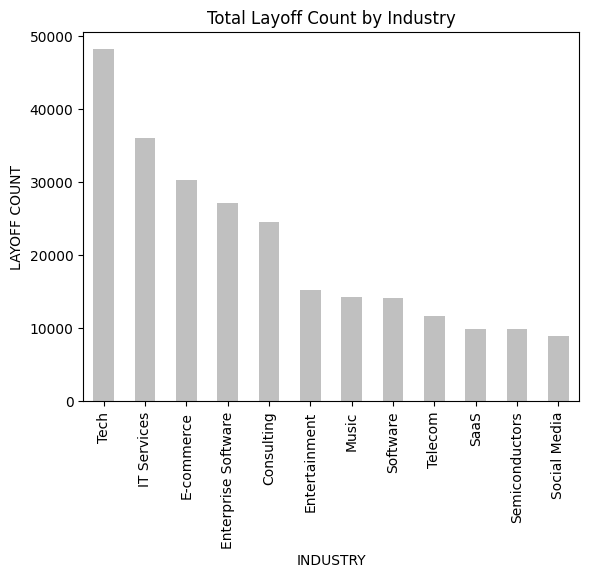

In [11]:
layoff = df.groupby('INDUSTRY')['LAYOFF_COUNT'].sum().sort_values(ascending=False)
layoff.plot(kind='bar', color='silver')
plt.title('Total Layoff Count by Industry')
plt.xlabel('INDUSTRY')
plt.ylabel('LAYOFF COUNT')
plt.xticks(rotation=90)
plt.show()

#### 8. Top 10 Countries Impacted by Layoffs
This bar plot displays the top 10 countries with the highest number of layoffs, providing a geographical perspective on the data.

C:\Users\chait\AppData\Local\Temp\ipykernel_23420\1648538517.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=impact.values, y=impact.index, palette='magma')


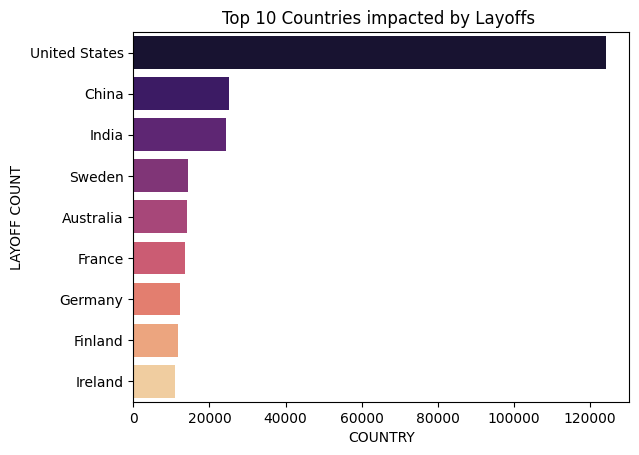

In [12]:
impact = df.groupby('COUNTRY')['LAYOFF_COUNT'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=impact.values, y=impact.index, palette='magma')
plt.title('Top 10 Countries impacted by Layoffs ')
plt.xlabel('COUNTRY')
plt.ylabel('LAYOFF COUNT')
plt.show()

#### 9. Layoff Reasons Across Industries
A heatmap is used to visualize the primary reasons for layoffs across different industries. This helps in understanding the underlying causes of workforce reductions in each sector.

[]

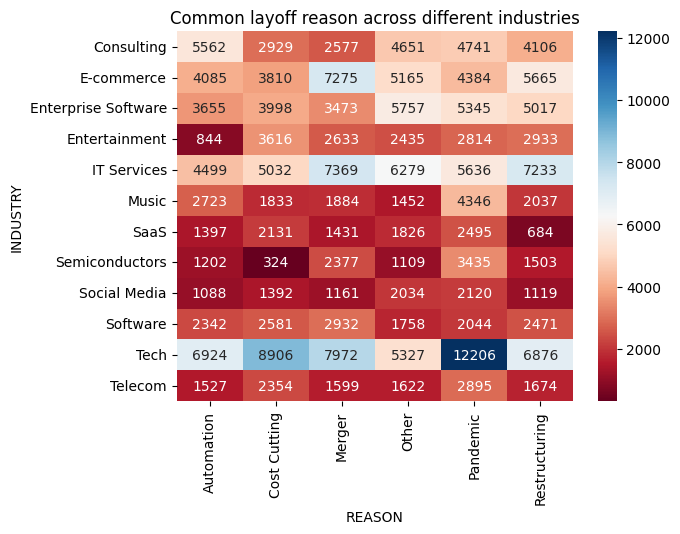

In [13]:
reason = pd.pivot_table(df, values='LAYOFF_COUNT', index='INDUSTRY', columns='LAYOFF_REASON', aggfunc='sum', fill_value=0)
sns.heatmap(reason, annot=True, fmt='.0f', cmap='RdBu')
plt.title('Common layoff reason across different industries')
plt.xlabel('REASON')
plt.ylabel('INDUSTRY')
plt.plot()

#### 10. Hiring Freeze Status
This pie chart shows the proportion of companies that implemented a hiring freeze during the layoff period.

[]

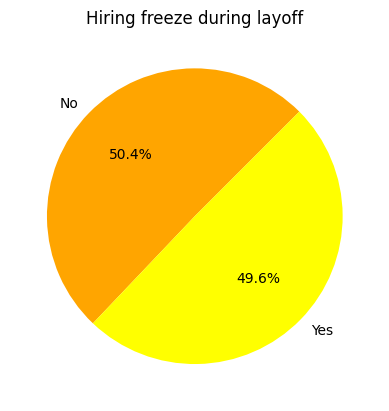

In [14]:
freeze = df['IS_HIRING_FREEZE'].value_counts()
freeze.plot(kind='pie', autopct='%1.1f%%', startangle=45, colors=['orange', 'yellow'])
plt.title('Hiring freeze during layoff')
plt.ylabel('')
plt.plot()

#### 11. Top 10 Companies with Highest Layoffs
This bar chart highlights the top 10 companies with the largest number of layoffs recorded in the dataset.

C:\Users\chait\AppData\Local\Temp\ipykernel_23420\3011240482.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=company.values, y=company.index, palette='Set1')


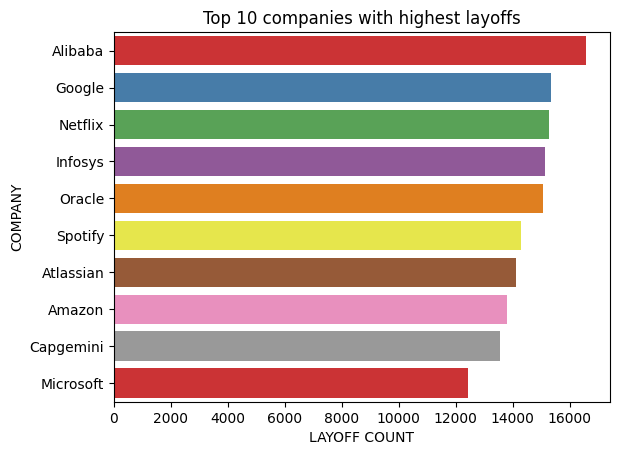

In [15]:
company = df.groupby('COMPANY')['LAYOFF_COUNT'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=company.values, y=company.index, palette='Set1')
plt.title('Top 10 companies with highest layoffs')
plt.xlabel('LAYOFF COUNT')
plt.ylabel('COMPANY')
plt.show()

#### 12. Monthly Layoff Trends
A new column LAYOFF_MONTH is created to analyze trends over time. The line chart shows the total number of layoffs per month, revealing any seasonality or significant periods of increased layoffs.

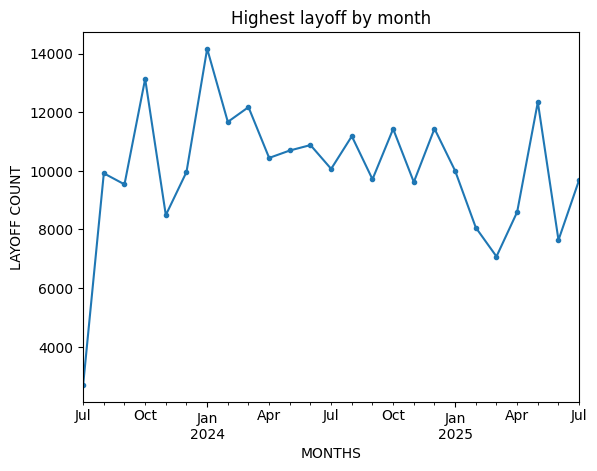

In [16]:
df['LAYOFF_MONTH'] = (df['LAYOFF_DATE']).dt.to_period('M')

month = df.groupby('LAYOFF_MONTH')['LAYOFF_COUNT'].sum()
month.plot(kind='line', marker='.')
plt.title('Highest layoff by month')
plt.xlabel('MONTHS')
plt.ylabel('LAYOFF COUNT')
plt.show()

#### 13. Final Data View
This cell calculates the mean layoff percentage by industry and displays the first 10 rows of the processed DataFrame to provide a final look at the cleaned data.

In [17]:
severe = df.groupby('INDUSTRY')['LAYOFF_PERCENTAGE'].mean().sort_values(ascending=False)
df.head(10)

,COMPANY,INDUSTRY,COUNTRY,LAYOFF_COUNT,TOTAL_EMPLOYEES,LAYOFF_PERCENTAGE,LAYOFF_DATE,LAYOFF_REASON,IS_HIRING_FREEZE,LAYOFF_MONTH
0,Capgemini,Consulting,France,13,3070,0.42,2024-06-24,Other,Yes,2024-06
1,Salesforce,SaaS,United States,40,6917,0.58,2023-10-23,Other,No,2023-10
2,Capgemini,Consulting,France,122,6208,1.97,2024-05-18,Merger,No,2024-05
3,Infosys,IT Services,India,473,6547,7.22,2024-05-21,Other,No,2024-05
4,Infosys,IT Services,India,478,7466,6.40,2024-03-19,Cost Cutting,No,2024-03
5,SAP,Enterprise Software,Germany,21,4571,0.46,2025-05-10,Merger,No,2025-05
6,Netflix,Entertainment,United States,483,3689,13.09,2023-09-24,Pandemic,Yes,2023-09
7,Infosys,IT Services,India,57,3946,1.44,2024-11-06,Automation,No,2024-11
8,Google,Tech,United States,386,2602,14.83,2023-12-04,Pandemic,No,2023-12
9,Tencent,Tech,China,267,7228,3.69,2024-07-12,Pandemic,No,2024-07
